# Rossmann Store Sales - Prediction Modelling
#### Ankit Kumar, June 2024

## 1. Loading cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset suitable for linear regression (one-hot encoded categorical variables)
data_LR = pd.read_csv("../data/cleaned/combined_data_cleaned_LR.csv")

# Dataset suitable for advanced models (label encoded categorical variables)
data_NL = pd.read_csv("../data/cleaned/combined_data_cleaned_NL.csv")

## 2. Preparing dataset

In [3]:
# Make sure we sort the dataset by date to set the ground for the time series split
data_LR.sort_values('Date', inplace=True);
data_NL.sort_values('Date', inplace=True);

data_LR.head()


,Store,Date,Sales,Customers,Promo,SchoolHoliday,Promo2,Log_CompetitionYears,Log_CompetitionDistance,Promo2Years,...,StoreType_A,StoreType_B,StoreType_C,StoreType_D,Assort_Basic,Assort_Extra,Assort_Extended,"Promo2_Feb,May,Aug,Nov","Promo2_Jan,Apr,Jul,Oct","Promo2_Mar,Jun,Sept,Dec"
1017208,1115,2013-01-01,0,0,0,1,1,1.357030,8.584852,0.66,...,0,0,0,1,0,0,1,0,0,1
679363,746,2013-01-01,0,0,0,1,1,0.650588,8.373323,1.41,...,0,0,0,1,0,0,1,0,0,1
155193,171,2013-01-01,0,0,0,1,0,1.357030,7.878534,0.00,...,1,0,0,0,1,0,0,0,0,0
632403,694,2013-01-01,0,0,0,1,1,-1.791759,6.131226,-1.69,...,1,0,0,0,0,0,1,0,1,0
361623,396,2013-01-01,0,0,0,1,0,1.357030,10.048886,0.00,...,1,0,0,0,0,0,1,0,0,0


In [4]:
data_LR['Date'].tail()

557530    2015-07-31
212332    2015-07-31
982701    2015-07-31
769288    2015-07-31
0         2015-07-31
Name: Date, dtype: object

In [5]:
#time-series split into train (first 80%) and cross-validation sets (last 20%)
split_point = int(len(data_LR)*0.8)
train_LR, cv_LR = data_LR[:split_point], data_LR[split_point:]
train_NL, cv_NL = data_NL[:split_point], data_NL[split_point:]

In [6]:
print(train_LR['Date'].head(), train_LR['Date'].tail())

1017208    2013-01-01
679363     2013-01-01
155193     2013-01-01
632403     2013-01-01
361623     2013-01-01
Name: Date, dtype: object 927835    2015-01-30
211572    2015-01-30
55804     2015-01-30
121420    2015-01-30
123304    2015-01-30
Name: Date, dtype: object


In [7]:
print(cv_LR['Date'].head(), cv_LR['Date'].tail())

708012    2015-01-30
334672    2015-01-30
579400    2015-01-30
138214    2015-01-30
480034    2015-01-30
Name: Date, dtype: object 557530    2015-07-31
212332    2015-07-31
982701    2015-07-31
769288    2015-07-31
0         2015-07-31
Name: Date, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

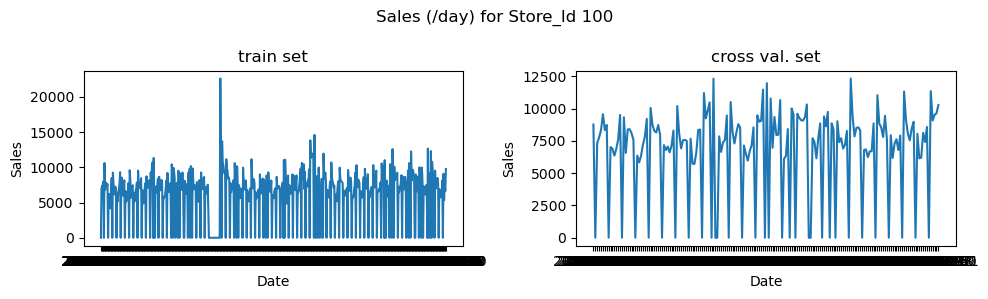

In [8]:
#Checking time-series sales plot for store id 100

train_s100 = train_LR.loc[train_LR['Store'] == 100]
cv_s100 = cv_LR.loc[cv_LR['Store'] == 100]

fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.lineplot(x='Date', y='Sales', data=train_s100, ax = axes[0])
axes[0].set_title('train set')
sns.lineplot(x='Date', y='Sales', data=cv_s100, ax = axes[1])
axes[1].set_title('cross val. set')
fig.suptitle('Sales (/day) for Store_Id 100')
plt.tight_layout()
plt.show()

## 3. Implementing Models

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Linear Regression

r2_score:  0.9019212095348723
Mean absolute error: 853.46
Root mean squared error:  1210.2049092186712


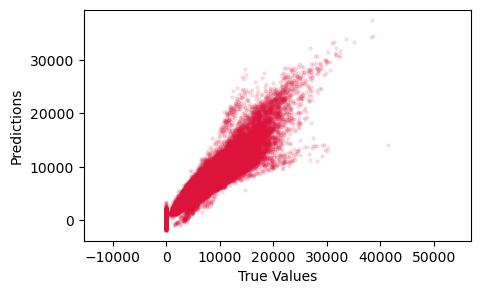

In [10]:
from sklearn import linear_model

X_train_LR = train_LR.drop(['Date', 'Sales'], axis=1)
y_train_LR = train_LR['Sales']
X_cv_LR = cv_LR.drop(['Date', 'Sales'], axis=1)
y_cv_LR = cv_LR['Sales']

model_LR = linear_model.LinearRegression() # making regression model
model_LR.fit(X_train_LR, y_train_LR) 
y_pred_LR = model_LR.predict(X_cv_LR)

print("r2_score: ",r2_score(y_cv_LR,y_pred_LR))
print("Mean absolute error: %.2f" % mean_absolute_error(y_cv_LR,y_pred_LR))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_cv_LR,y_pred_LR)))

plt.figure(figsize=(5,3))
plt.scatter(y_cv_LR,y_pred_LR, c='crimson', s = 5, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

#### Decision Tree Regressor

r2_score:  0.9593917888303575
Mean absolute error: 470.99
Root mean squared error:  778.7145493645052


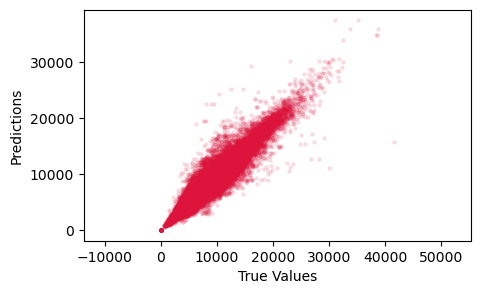

In [11]:
from sklearn.tree import DecisionTreeRegressor

X_train_NL = train_NL.drop(['Date', 'Sales'], axis=1)
y_train_NL = train_NL['Sales']
X_cv_NL = cv_NL.drop(['Date', 'Sales'], axis=1)
y_cv_NL = cv_NL['Sales']

model_DT = DecisionTreeRegressor() # making regression model
model_DT.fit(X_train_NL, y_train_NL) 
y_pred_DT = model_DT.predict(X_cv_NL)

print("r2_score: ",r2_score(y_cv_NL,y_pred_DT))
print("Mean absolute error: %.2f" % mean_absolute_error(y_cv_NL,y_pred_DT))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_cv_NL,y_pred_DT)))

plt.figure(figsize=(5,3))
plt.scatter(y_cv_NL,y_pred_DT, c='crimson', s = 5, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

#### Random Forest Regressor

r2_score:  0.9790053677550965
Mean absolute error: 342.24
Root mean squared error:  559.9193746665345


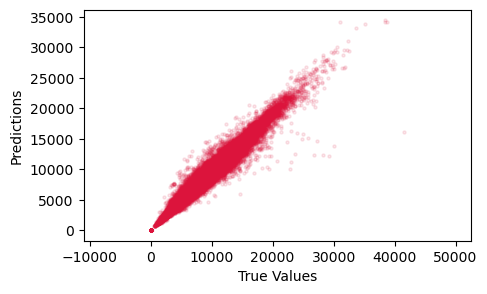

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(X_train_NL, y_train_NL) 
y_pred_RF = model_RF.predict(X_cv_NL)

print("r2_score: ",r2_score(y_cv_NL,y_pred_RF))
print("Mean absolute error: %.2f" % mean_absolute_error(y_cv_NL,y_pred_RF))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_cv_NL,y_pred_RF)))

plt.figure(figsize=(5,3))
plt.scatter(y_cv_NL,y_pred_RF, c='crimson', s = 5, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()


**Obervation**: Random Forest Regressor had the lowest error as compared to other models.

## Feature Importance Analysis

In [32]:
# getting weights of all the features used in the data
feature_importance = model_DT.feature_importances_
feature_importance

array([2.00948884e-02, 5.43074546e-03, 8.60122173e-01, 1.72394018e-02,
       1.01308885e-04, 3.78662173e-04, 3.42240638e-02, 5.69613980e-03,
       1.75637411e-03, 2.09245239e-03, 3.01318594e-03, 4.04801020e-03,
       4.86074670e-04, 6.94836845e-03, 3.15059876e-02, 6.86216297e-03])

In [33]:
# making a dataframe
feature_importance_df = pd.DataFrame({"Features":list(X_train_NL.columns),
                                     "Values":feature_importance.round(5)})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)

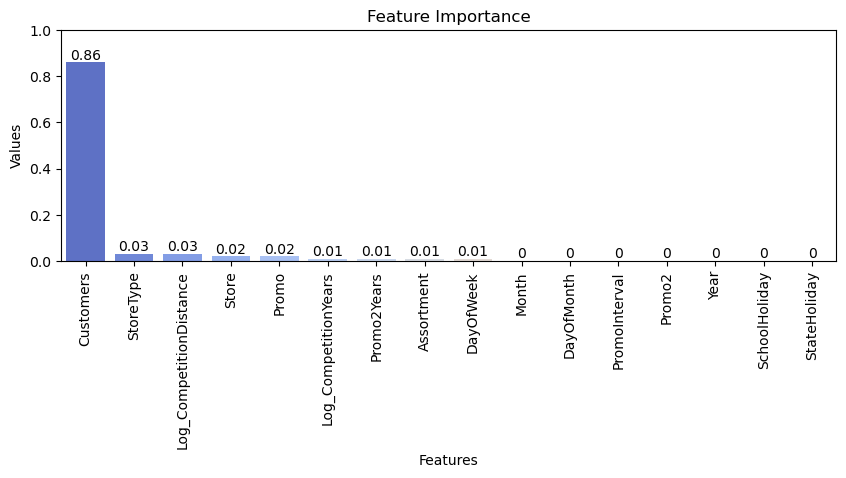

In [40]:
# Feature Importance
plt.figure(figsize=(10,3))

ax = sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'].round(2),
            data = feature_importance_df, palette='coolwarm')
ax.set(title='Feature Importance')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

r2_score:  0.8416932690630423
Mean absolute error: 898.84
Root mean squared error:  1537.520977945126


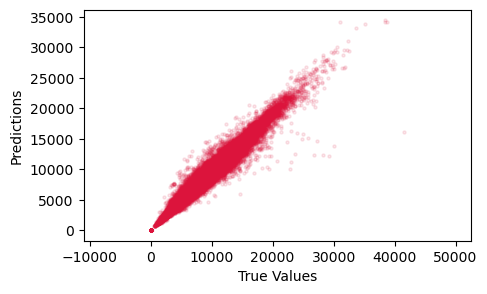

In [43]:
#Redo modelling with customers feature removed

X_train_NL = train_NL.drop(['Date', 'Sales', 'Customers'], axis=1)
y_train_NL = train_NL['Sales']
X_cv_NL = cv_NL.drop(['Date', 'Sales', 'Customers'], axis=1)
y_cv_NL = cv_NL['Sales']

model_DT = DecisionTreeRegressor() # making regression model
model_DT.fit(X_train_NL, y_train_NL) 
y_pred_DT = model_DT.predict(X_cv_NL)

feature_importance = model_DT.feature_importances_
feature_importance_df = pd.DataFrame({"Features":list(X_train_NL.columns),
                                     "Values":feature_importance.round(5)})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)


print("r2_score: ",r2_score(y_cv_NL,y_pred_DT))
print("Mean absolute error: %.2f" % mean_absolute_error(y_cv_NL,y_pred_DT))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_cv_NL,y_pred_DT)))

plt.figure(figsize=(5,3))
plt.scatter(y_cv_NL,y_pred_RF, c='crimson', s = 5, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()


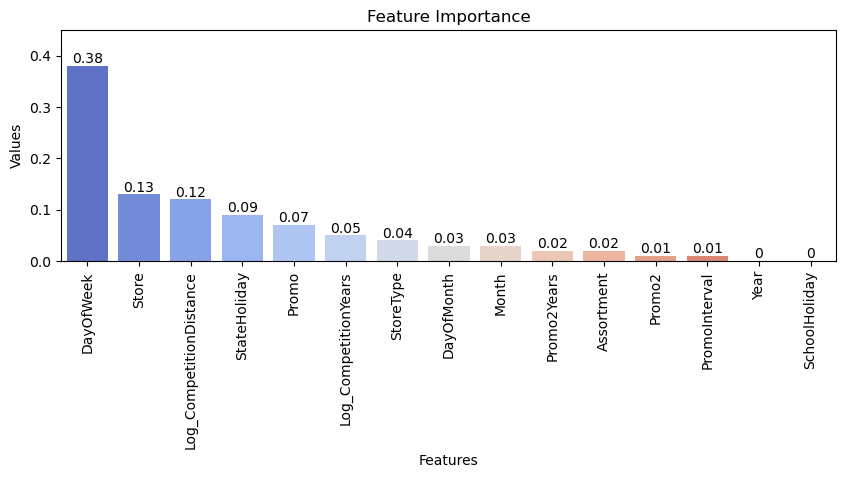

In [47]:
plt.figure(figsize=(10,3))

ax = sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'].round(2),
            data = feature_importance_df, palette='coolwarm')
ax.set(title='Feature Importance')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xticks(rotation=90)
plt.ylim(0,0.45)
plt.show()

## To do:
Predict the sales